# Modelo Diario

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [ ]:
from prophet import Prophet

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
diario = pd.read_csv('diario_inter.csv')
diario['pickup_datetime'] = pd.to_datetime(diario['pickup_datetime'])
diario.set_index('pickup_datetime', inplace=True)

## Preparacion

In [ ]:
diario

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-05,99802,125552.34,1540935.85,8.975522e+05,78924.0
2023-09-06,114485,141650.92,1844221.48,1.124817e+06,91117.0
2023-09-07,126533,156753.91,2059376.29,1.273202e+06,100287.0
2023-09-08,124365,148088.32,1943639.53,1.199228e+06,95452.0
2023-09-09,126584,147491.51,1787366.36,1.107545e+06,90972.0
...,...,...,...,...,...
2024-08-27,91633,120296.62,1418567.88,8.241690e+05,73266.0
2024-08-28,101202,130843.35,1570150.82,9.204025e+05,81088.0
2024-08-29,96395,124708.58,1498053.45,8.947159e+05,76483.0


In [ ]:
diario_p = diario['n_trips']

In [ ]:
diario_p

,n_trips
pickup_datetime,
2023-09-05,78924.0
2023-09-06,91117.0
2023-09-07,100287.0
2023-09-08,95452.0
2023-09-09,90972.0
...,...
2024-08-27,73266.0
2024-08-28,81088.0
2024-08-29,76483.0


In [ ]:
diario_p = diario_p.reset_index()

In [ ]:
diario_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
diario_p

,ds,y
0,2023-09-05,78924.0
1,2023-09-06,91117.0
2,2023-09-07,100287.0
3,2023-09-08,95452.0
4,2023-09-09,90972.0
...,...,...
357,2024-08-27,73266.0
358,2024-08-28,81088.0
359,2024-08-29,76483.0
360,2024-08-30,70549.0


## Mejor Modelo

In [126]:
# Instanciamos un modelo de Prophet

prophet_m = Prophet(yearly_seasonality= True, uncertainty_samples = 20, mcmc_samples=20, interval_width= 0.5)

# Entrenamos el modelo
prophet_m.fit(diario_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 365 dias.
build_forecast = prophet_m.make_future_dataframe(periods=365, freq='D') #

# Predecimos
forecast_m = prophet_m.predict(build_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/4_slodts.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/j54f3fwk.json
22:22:13 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=90196', 'data', 'file=/tmp/tmp8ke_jo2c/4_slodts.json', 'init=/tmp/tmp8ke_jo2c/j54f3fwk.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modeloq8y5krl/prophet_model-20241113222213_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=90196', 'data', 'file=/tmp/tmp8ke_jo2c/4_slodts.json', 'init=/tmp/tmp8ke_jo2c/j54f3fwk.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modeloq8y5krl/prophet_model-20241113222213_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

22:22:14 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=90196', 'data', 'file=/tmp/tmp8ke_jo2c/4_slodts.json', 'init=/tmp/tmp8ke_jo2c/j54f3fwk.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modeloq8y5krl/prophet_model-20241113222213_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp8ke_jo2c/prophet_modeloq8y5krl/prophet_model-20241113222213_1.csv
 console_msgs (if any):
	/tmp/tmp8ke_jo2c/prophet_modeloq8y5krl/prophet_model-20241113222213_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [127]:
forecast_m

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-05,92192.175757,81303.501438,95869.586127,86959.302209,99852.032612,-4111.721210,-8339.631260,1024.886894,-1.283000,-952.706573,1049.442214,-4110.438210,-8196.899249,959.940581,0.0,0.0,0.0,88080.454546
1,2023-09-06,92178.105315,88297.745582,96988.375870,86979.707489,99832.353418,142.343408,-4040.966581,5372.621161,4757.859093,3757.869335,5642.378501,-4615.515684,-8541.713262,612.652961,0.0,0.0,0.0,92320.448723
2,2023-09-07,92164.034874,90805.322443,103864.625863,87000.112768,99807.017424,3088.327587,434.006121,7034.493300,8250.922014,7277.561637,9349.658452,-5162.594427,-9264.627418,195.403763,0.0,0.0,0.0,95252.362461
3,2023-09-08,92149.964433,85281.386536,97220.088067,87003.127949,99777.653978,-1422.641640,-5359.358566,3980.559472,4315.237147,4048.220921,4710.125456,-5737.878787,-9928.394432,-282.254058,0.0,0.0,0.0,90727.322793
4,2023-09-09,92135.893992,89254.421256,101802.470339,86974.957188,99757.472633,202.133897,-3854.201293,5350.438043,6528.880761,5786.286521,7441.148585,-6326.746864,-10485.217442,-809.596835,0.0,0.0,0.0,92338.027889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2025-08-27,48333.794744,29792.603367,79354.915896,19765.159474,77386.548845,2032.825126,-2997.575950,8451.540410,4757.859093,3757.869335,5642.378501,-2725.033967,-8721.113700,4796.417649,0.0,0.0,0.0,50366.619869
723,2025-08-28,48262.472559,28267.250312,78499.487787,19694.398035,77413.910647,5662.809232,525.319644,12762.851779,8250.922014,7277.561637,9349.658452,-2588.112782,-8716.693370,3952.879527,0.0,0.0,0.0,53925.281791
724,2025-08-29,48191.150375,26007.893395,77908.584528,19623.636595,77441.272450,1789.102693,-4963.575606,7131.061046,4315.237147,4048.220921,4710.125456,-2526.134454,-8739.270656,3000.175443,0.0,0.0,0.0,49980.253068
725,2025-08-30,48119.828190,25524.229434,79781.725621,19552.875156,77466.207276,3983.550438,-2924.166393,8386.902634,6528.880761,5786.286521,7441.148585,-2545.330323,-8814.956491,2073.272378,0.0,0.0,0.0,52103.378628


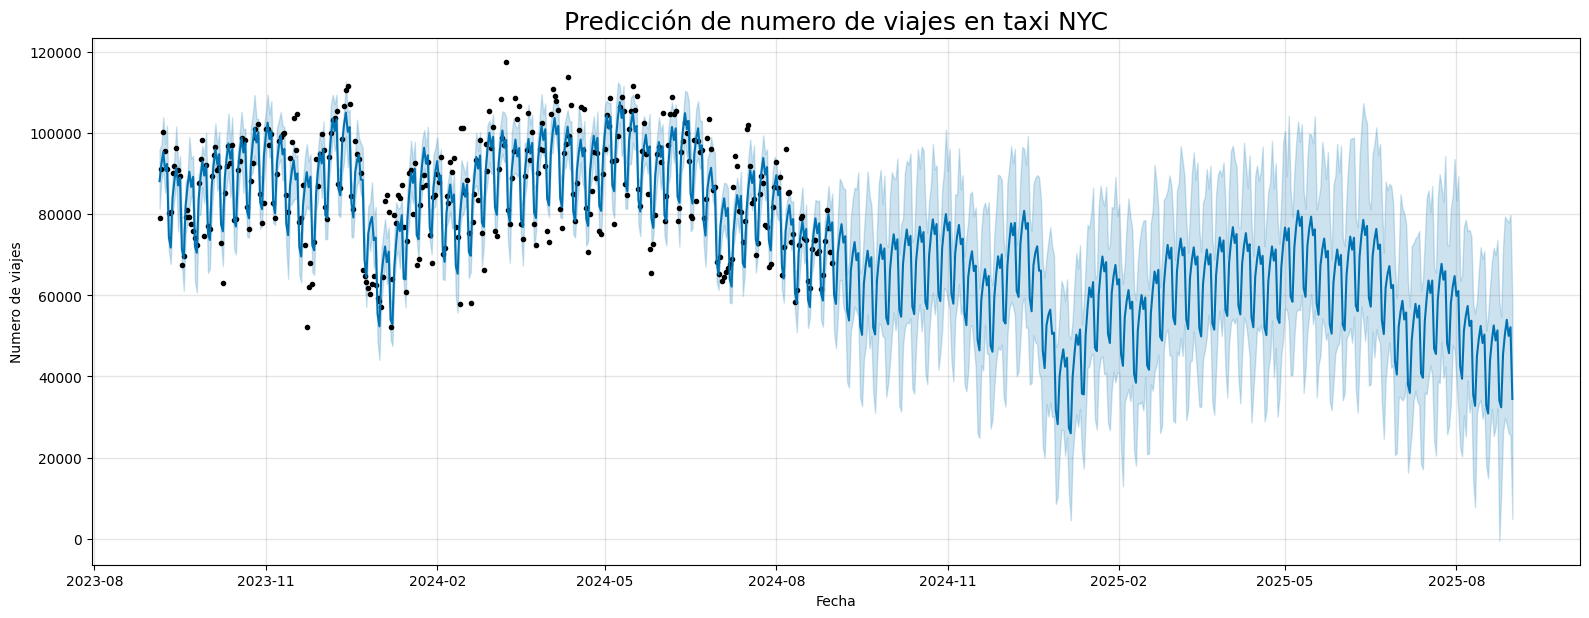

In [128]:
prophet_m.plot(forecast_m, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

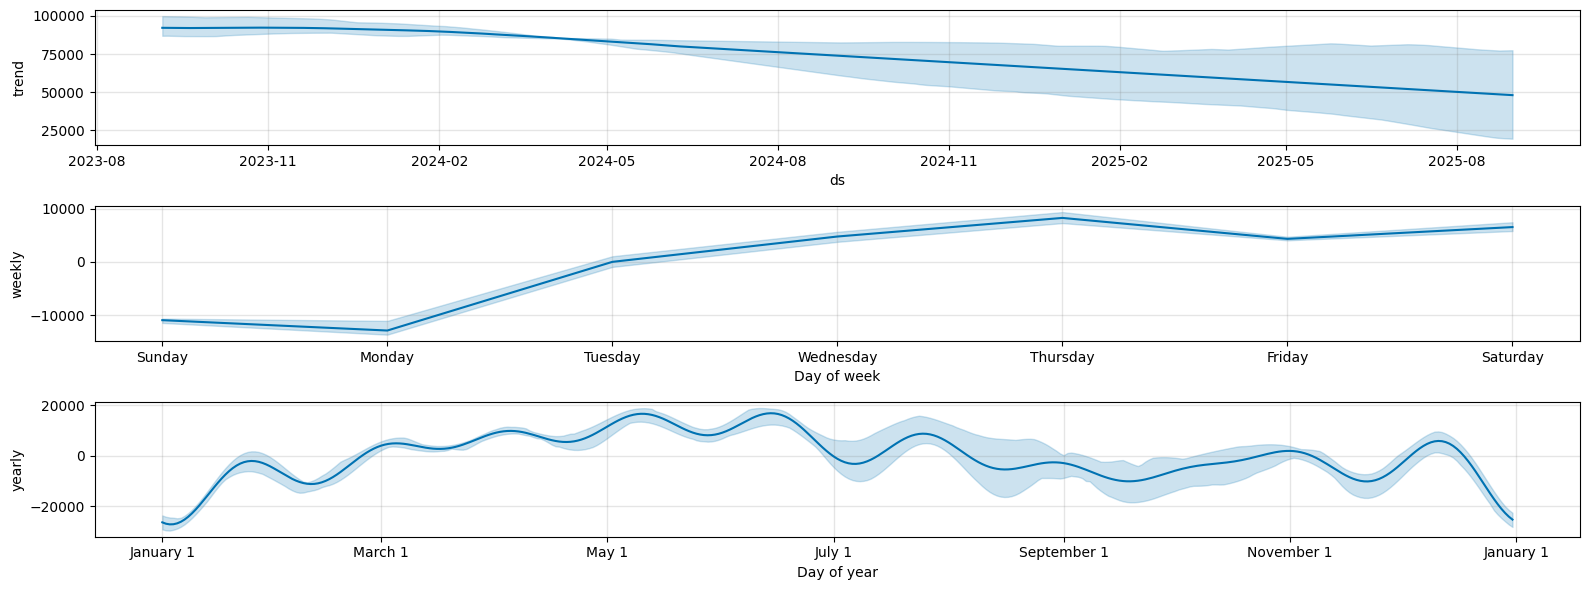

In [129]:
components = prophet_m.plot_components(forecast_m, figsize=(16,6))

### Evaluacion

In [130]:
df_cv_m = cross_validation(prophet_m, initial = '120 days', horizon = '120 days')

INFO:prophet:Making 3 forecasts with cutoffs between 2024-01-04 00:00:00 and 2024-05-03 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/pvcefeqe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/yij2uiz7.json
22:22:36 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=23914', 'data', 'file=/tmp/tmp8ke_jo2c/pvcefeqe.json', 'init=/tmp/tmp8ke_jo2c/yij2uiz7.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model8cqtdmjk/prophet_model-20241113222236_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=23914', 'data', 'file=/tmp/tmp8ke_jo2c/pvcefeqe.json', 'init=/tmp/tmp8ke_jo2c/yij2uiz7.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model8cqtdmjk/prophet_model-20241113222236_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

22:22:37 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=23914', 'data', 'file=/tmp/tmp8ke_jo2c/pvcefeqe.json', 'init=/tmp/tmp8ke_jo2c/yij2uiz7.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model8cqtdmjk/prophet_model-20241113222236_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp8ke_jo2c/prophet_model8cqtdmjk/prophet_model-20241113222236_1.csv
 console_msgs (if any):
	/tmp/tmp8ke_jo2c/prophet_model8cqtdmjk/prophet_model-20241113222236_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/8u0nge4y.json
22:22:37 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=91673', 'data', 'file=/tmp/tmp8ke_jo2c/ukkpht6s.json', 'init=/tmp/tmp8ke_jo2c/8u0nge4y.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model6xstxpfc/prophet_model-20241113222237_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=91673', 'data', 'file=/tmp/tmp8ke_jo2c/ukkpht6s.json', 'init=/tmp/tmp8ke_jo2c/8u0nge4y.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model6xstxpfc/prophet_model-20241113222237_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

22:22:38 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=91673', 'data', 'file=/tmp/tmp8ke_jo2c/ukkpht6s.json', 'init=/tmp/tmp8ke_jo2c/8u0nge4y.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model6xstxpfc/prophet_model-20241113222237_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp8ke_jo2c/prophet_model6xstxpfc/prophet_model-20241113222237_1.csv
 console_msgs (if any):
	/tmp/tmp8ke_jo2c/prophet_model6xstxpfc/prophet_model-20241113222237_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/r2ewaa2y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/viirq3w1.json
22:22:38 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=1671', 'data', 'file=/tmp/tmp8ke_jo2c/r2ewaa2y.json', 'init=/tmp/tmp8ke_jo2c/viirq3w1.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelnp4uo73v/prophet_model-20241113222238_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=1671', 'data', 'file=/tmp/tmp8ke_jo2c/r2ewaa2y.json', 'init=/tmp/tmp8ke_jo2c/viirq3w1.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelnp4uo73v/prophet_model-20241113222238_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:

22:22:38 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=1671', 'data', 'file=/tmp/tmp8ke_jo2c/r2ewaa2y.json', 'init=/tmp/tmp8ke_jo2c/viirq3w1.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelnp4uo73v/prophet_model-20241113222238_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp8ke_jo2c/prophet_modelnp4uo73v/prophet_model-20241113222238_1.csv
 console_msgs (if any):
	/tmp/tmp8ke_jo2c/prophet_modelnp4uo73v/prophet_model-20241113222238_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)
 

In [131]:
df_cv_m


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2024-01-05,82629.402124,79960.012595,86277.460422,84757.0,2024-01-04
1,2024-01-06,91125.521777,82444.792932,98707.136366,80497.0,2024-01-04
2,2024-01-07,82779.780920,75485.911199,89931.563684,52261.0,2024-01-04
3,2024-01-08,89215.214370,82271.358909,96495.085493,64069.0,2024-01-04
4,2024-01-09,109270.181293,95046.420532,119999.961961,79631.0,2024-01-04
...,...,...,...,...,...,...
355,2024-08-27,128663.644886,106762.815475,151788.328016,73266.0,2024-05-03
356,2024-08-28,143427.091298,106065.317278,182058.571942,81088.0,2024-05-03
357,2024-08-29,157248.934179,115079.227671,211745.000384,76483.0,2024-05-03
358,2024-08-30,157705.712713,111963.669763,219979.077257,70549.0,2024-05-03


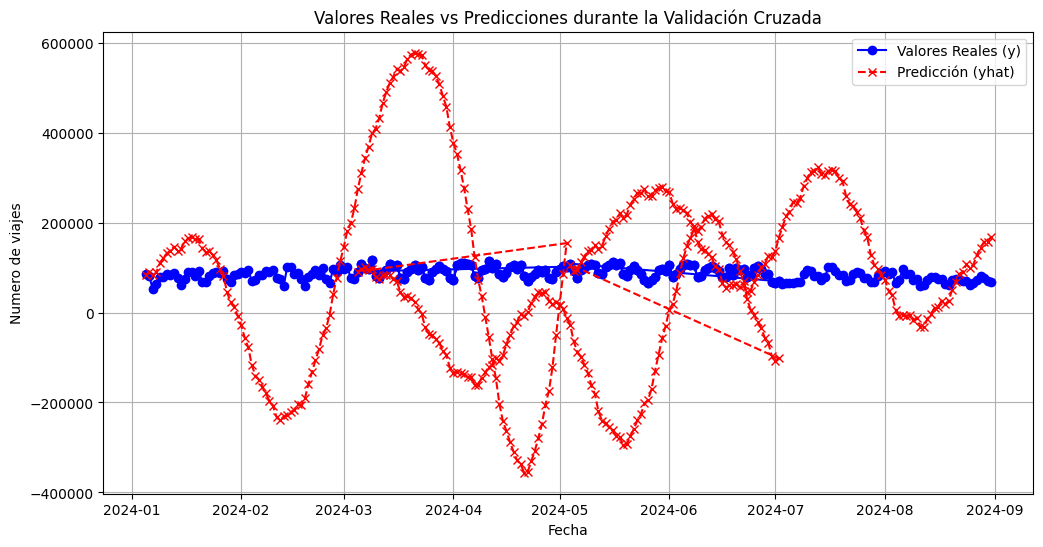

In [132]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_m['ds'], df_cv_m['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_m['ds'], df_cv_m['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


In [133]:
df_p_m = performance_metrics(df_cv_m)
df_p_m.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,109,1.090000e+02,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,66 days 00:00:00,4.165632e+10,187239.320041,161372.122013,1.840395,1.650715,1.222606,0.570591
std,31 days 14:37:49.241158121,3.428510e+10,81601.774609,79486.692286,0.876942,0.941452,0.296735,0.258915
min,12 days 00:00:00,1.587420e+09,39842.439455,30933.727497,0.365298,0.277852,0.288617,0.000000
25%,39 days 00:00:00,1.519226e+10,123256.867998,101493.982035,1.155701,0.944160,1.046678,0.416667
50%,66 days 00:00:00,3.459756e+10,186004.185556,152444.638687,1.785617,1.190149,1.274666,0.666667
75%,93 days 00:00:00,5.245613e+10,229033.027010,192176.063606,2.165339,2.230789,1.453237,0.750000
max,120 days 00:00:00,1.283613e+11,358275.437552,342501.457843,3.797481,3.631801,1.595388,0.916667


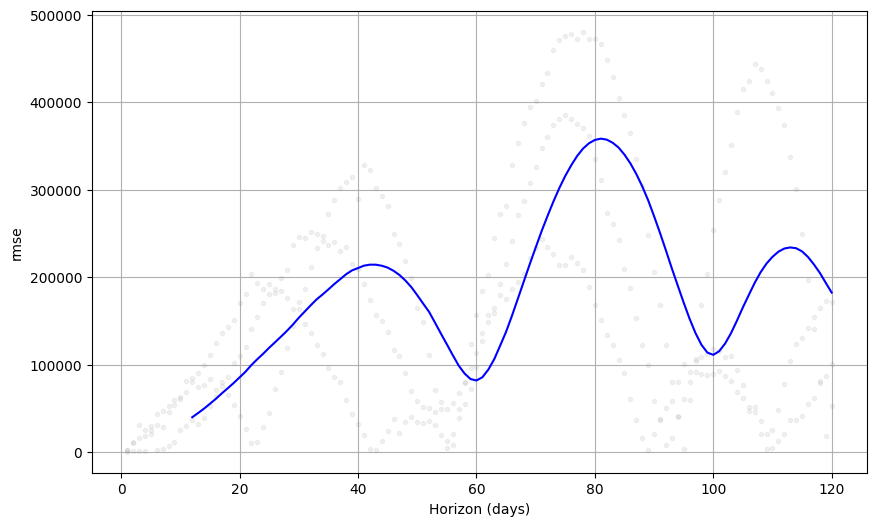

In [134]:
fig = plot_cross_validation_metric(df_cv_m, metric='rmse')

In [135]:
print('El RMSE es:', df_p_m.rmse.mean())

El RMSE es: 187239.32004064447


In [136]:
print('El MAE es:', df_p_m.mae.mean())

El MAE es: 161372.12201273124


In [137]:
print('El MAPE es:', df_p_m.mape.mean())

El MAPE es: 1.840395276856374


In [138]:
print('El MSE es:', df_p_m.mse.mean())

El MSE es: 41656322225.21205


In [139]:
print('La cobertura es:', df_p_m.coverage.mean())

La cobertura es: 0.5705912334352702


In [142]:
print('RMSE + MAE + MAPE:',df_p_m.rmse.mean() + df_p_m.mae.mean() + df_p_m.mape.mean())

RMSE + MAE + MAPE: 348613.28244865255


In [125]:
forecast_m.to_csv('forecast_diario_m(185744).csv')

In [124]:
df_p_1 = performance_metrics(df_cv_m, rolling_window = 1)
df_p_1

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,120 days,4.083845e+10,202085.252931,146596.581953,1.667911,1.053741,1.120668,0.516667
